In [20]:
import pandas as pd

# Ruta al archivo Excel
file_path = 'CHC_base_anonimizada09-09-2021.xlsx'

# Cargar la hoja de datos
data = pd.read_excel(file_path, sheet_name='Datos')

# Cargar la hoja de metadatos
metadata = pd.read_excel(file_path, sheet_name='Metadatos')

# Limpiar y preparar los metadatos
# Llenar los valores NaN hacia adelante en las columnas necesarias para que cada valor tenga su variable correspondiente
metadata['variable'].fillna(method='ffill', inplace=True)
metadata['pregunta'].fillna(method='ffill', inplace=True)
metadata['id'].fillna(method='ffill', inplace=True)
metadata['tipo_dato'].fillna(method='ffill', inplace=True)

In [21]:
data.head()

,DIRECTORIO,TIP_FOR,P1,P1S1,P2,P2S1,P5,CTL_1,P8R,P9,...,P35,P36R,P37S1,P37S2,P37S3,P37S4,P37S5,P37S6,P37S7,COMPLETA
0,1,2,85,85001,1,5.0,2,1,44.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2,2,85,85001,1,5.0,2,1,33.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,3,2,85,85001,1,5.0,2,1,41.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,4,2,85,85001,1,5.0,2,1,29.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,5,2,85,85001,1,5.0,2,1,30.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


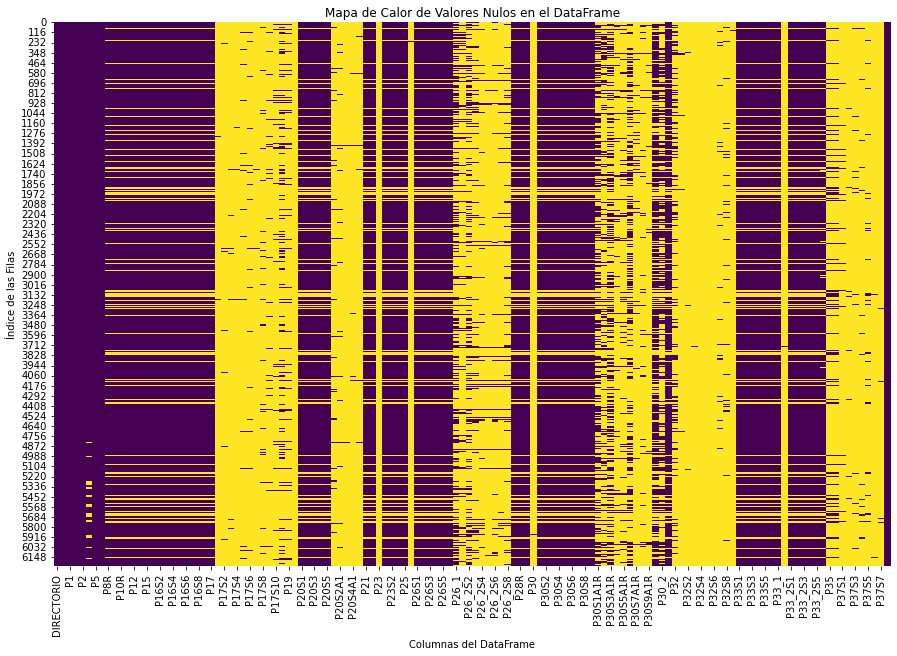

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un DataFrame donde True indica que el valor es nulo
missing_data = data.isnull()

# Configurar el tamaño del gráfico
plt.figure(figsize=(15, 10))

# Crear un mapa de calor. Los valores True (nulos) se mostrarán con un color diferente
sns.heatmap(missing_data, cbar=False, cmap='viridis')

# Opciones de visualización para mejorar la legibilidad
plt.title('Mapa de Calor de Valores Nulos en el DataFrame')
plt.xlabel('Columnas del DataFrame')
plt.ylabel('Índice de las Filas')

# Mostrar el gráfico
plt.show()

In [23]:
import numpy as np

# Calcular el porcentaje de nulos por columna
null_percent_cols = data.isnull().mean() * 100

# Calcular el porcentaje de nulos por fila
null_percent_rows = data.isnull().mean(axis=1) * 100

# Mostrar el porcentaje de nulos por columna
print("Porcentaje de Nulos por Columna:")
print(null_percent_cols.sort_values(ascending=False))

# Mostrar el porcentaje de nulos por fila
print("\nPorcentaje de Nulos por Fila:")
print(null_percent_rows.describe())

# Opcional: filtrar y mostrar filas con un alto porcentaje de nulos
threshold_row = 50  # Por ejemplo, el 50% de nulos
high_null_rows = null_percent_rows[null_percent_rows > threshold_row]
print("\nFilas con más del 50% de nulos:")
print(high_null_rows)

# Decidir sobre la eliminación de filas
rows_to_drop = high_null_rows.index
data_cleaned_rows = data.drop(index=rows_to_drop)

Porcentaje de Nulos por Columna:
P23         100.00000
P20          99.96799
P32S4        99.96799
P33          99.93598
P32S6        99.93598
              ...    
P5            0.00000
P2            0.00000
P1S1          0.00000
P1            0.00000
COMPLETA      0.00000
Length: 130, dtype: float64

Porcentaje de Nulos por Fila:
count    6248.000000
mean       49.433172
std        17.181204
min        28.461538
25%        41.538462
50%        43.076923
75%        45.384615
max        91.538462
dtype: float64

Filas con más del 50% de nulos:
9       90.769231
16      90.769231
17      90.769231
19      90.769231
20      90.769231
          ...    
6230    90.769231
6235    91.538462
6237    90.769231
6239    89.230769
6240    90.769231
Length: 908, dtype: float64


In [24]:
# Filtrar columnas
columns = [col for col in data_cleaned_rows.columns if col.startswith('P17')] # cero por contexto
columns = columns + ['P18','P26_1','P30_1','P30_2',#opciones de descarte
                     'P19','P20S1A1','P20S2A1','P20S3A1','P20S4A1','P20S5A1'# cero por contexto
                     ] 
columns = columns + [col for col in data_cleaned_rows.columns if col.startswith('P26_2S')]# cero por contexto
columns = columns + [col for col in data_cleaned_rows.columns if col.startswith('P32')]# cero por contexto

columns_edad =  ['P30S1A1R','P30S2A1R','P30S3A1R','P30S4A1R','P30S5A1R','P30S6A1R','P30S7A1R','P30S8A1R','P30S9A1R']

# Asignar 0 a los valores nulos en esas columnas
data_cleaned_rows[columns] = data_cleaned_rows[columns].fillna(0)

# Asignar -1 a los valores nulos en las columnas de edad de consumo
data_cleaned_rows[columns_edad] = data_cleaned_rows[columns_edad].fillna(-1)

# Asignar -1 a los valores nulos en la columna de orientacion sexual
data_cleaned_rows['P34'] = data_cleaned_rows['P34'].fillna(-1)


In [25]:
# Calcular la moda de la columna 'P2S1'
moda_departamento = data_cleaned_rows['P2S1'].mode()[0]

# Imputar la moda en los valores nulos de la columna 'P2S1'
data_cleaned_rows['P2S1'].fillna(moda_departamento, inplace=True)

In [26]:
columns_to_drop = ['DIRECTORIO','TIP_FOR','P20','P23','P26','P30','P33','P33_2','P35','P36R','P37S1','P37S2','P37S3','P37S4','P37S5','P37S6','P37S7','COMPLETA']

# Asegurarse de que solo se intenten eliminar columnas que existen en el DataFrame
columns_to_drop = [col for col in columns_to_drop if col in data_cleaned_rows.columns]

# Eliminar las columnas especificadas del DataFrame
data_cleaned_rows.drop(columns=columns_to_drop, inplace=True)

In [27]:
null_counts = data_cleaned_rows.isnull().sum()

# Filtrar para mostrar solo las columnas que aún tienen valores nulos
columns_with_nulls = null_counts[null_counts > 0]

# Mostrar los resultados
print("Columnas con valores nulos y su cantidad:")
print(columns_with_nulls)

Columnas con valores nulos y su cantidad:
Series([], dtype: int64)


In [28]:
metadata.head(20)

,variable,pregunta,id,tipo_dato,valor,desc_valor,tipo_pregunta
0,DIRECTORIO,DIRECTORIO,DIRECTORIO,NUMBER (15),NaN,Identificador asignado a la encuesta en el pro...,numerica
1,TIP_FOR,Formulario aplicado en:,TIP_FOR,NUMBER (1),1.0,DMC,categorica
2,P1,1. Departamento,P1,VARCHAR2 (2 Byte),NaN,NaN,categorica
3,P1S1,1.1 Municipio o Área no municipalizada,P1S1,VARCHAR2 (5 Byte),NaN,NaN,categorica
4,P2,2. Clase,P2,NUMBER (1),1.0,1. Cabecera municipal (clase 1),categorica
5,P2S1,Localidad/Comuna,P2S1,VARCHAR2 (7 Byte),NaN,NaN,categorica
6,P5,5. Lugar de la entrevista,P5,NUMBER (1),1.0,"1. En la calle (puente, andén, parque, alcanta...",categorica
7,P5,5. Lugar de la entrevista,P5,NUMBER (1),2.0,2. En institución,categorica
8,P5,5. Lugar de la entrevista,P5,NUMBER (1),3.0,"3. En un dormitorio transitorio (hotel, paga d...",categorica
9,P5,5. Lugar de la entrevista,P5,NUMBER (1),4.0,4. En otro lugar,categorica


In [29]:
# Crear un diccionario para mapear los códigos a descripciones para cada variable
value_maps = {}
for var in metadata['variable'].unique():
    temp_df = metadata[metadata['variable'] == var]
    value_map = dict(zip(temp_df['valor'], temp_df['desc_valor']))
    value_maps[var] = value_map
value_maps

{'DIRECTORIO': {nan: 'Identificador asignado a la encuesta en el proceso de cargue'},
 'TIP_FOR': {1.0: 'DMC'},
 'P1': {nan: nan},
 'P1S1': {nan: nan},
 'P2': {1.0: '1. Cabecera municipal (clase 1)'},
 'P2S1': {nan: nan},
 'P5': {1.0: '1. En la calle (puente, andén, parque, alcantarilla, etc).\n',
  2.0: '2. En institución',
  3.0: '3. En un dormitorio transitorio (hotel, paga diario, inquilinato, residencia, camarote)',
  4.0: '4. En otro lugar'},
 'CTL_1': {1.0: '1. Con entrevista directa', 2.0: '2. Por observación'},
 'P8R': {nan: nan},
 'P9': {1.0: '1. Hombre', 2.0: '2. Mujer'},
 'P10R': {1.0: '1. Registro civil de nacimiento',
  2.0: '2. Tarjeta de identidad',
  3.0: '3. Cédula de ciudadanía',
  4.0: '4. Cédula de extranjería',
  5.0: '5. No tiene documento de identidad',
  6.0: '6. No sabe',
  7.0: '7. No responde'},
 'P11': {1.0: '1. En este municipio',
  2.0: '2. En otro municipio colombiano',
  3.0: '3. En otro país'},
 'P12': {1.0: '1. En este municipio',
  2.0: '2. En otro m

In [30]:
# Filtrar las variables binarias desde los metadatos y asegurar que solo se consideren las que existen en el DataFrame actual
binary_vars = metadata[metadata['tipo_pregunta'] == 'binaria']['variable'].drop_duplicates()
binary_vars = [var for var in binary_vars if var in data_cleaned_rows.columns]

# Ajustar los valores en el DataFrame de datos para las variables binarias
for var in binary_vars:
    # Cambiar 2 a 0; 1 ya está como 1
    data_cleaned_rows[var] = data_cleaned_rows[var].replace({2: 0})

# Opcional: Verificar los cambios en alguna de las variables binarias
print("Verificación de las variables binarias ajustadas:")
print(data_cleaned_rows[binary_vars].head())

Verificación de las variables binarias ajustadas:
   P17  P19  P20S1  P20S2  P20S3  P20S4  P20S5  P20S1A1  P20S2A1  P20S3A1  \
0  1.0  1.0    0.0    0.0    0.0    0.0    0.0      0.0      0.0      0.0   
1  1.0  1.0    0.0    0.0    0.0    0.0    0.0      0.0      0.0      0.0   
2  0.0  0.0    0.0    0.0    0.0    0.0    0.0      0.0      0.0      0.0   
3  1.0  0.0    0.0    0.0    0.0    0.0    0.0      0.0      0.0      0.0   
4  1.0  1.0    0.0    0.0    0.0    0.0    0.0      0.0      0.0      0.0   

   ...  P33S3  P33S4  P33S5  P33S6  P33_1  P33_2S1  P33_2S2  P33_2S3  P33_2S4  \
0  ...    1.0    0.0    0.0    0.0    1.0      0.0      0.0      0.0      0.0   
1  ...    0.0    0.0    0.0    0.0    1.0      0.0      0.0      0.0      0.0   
2  ...    0.0    0.0    0.0    0.0    0.0      0.0      0.0      0.0      0.0   
3  ...    1.0    1.0    1.0    0.0    0.0      0.0      0.0      0.0      0.0   
4  ...    0.0    0.0    0.0    0.0    0.0      1.0      0.0      0.0      1.0   



In [34]:
# Filtrar las variables binarias desde los metadatos y asegurar que solo se consideren las que existen en el DataFrame actual
binary_vars = metadata[metadata['tipo_pregunta'] == 'binaria']['variable'].drop_duplicates()
binary_vars = [var for var in binary_vars if var in data_cleaned_rows.columns]

# Ajustar los valores en el DataFrame de datos para las variables binarias
for var in binary_vars:
    data_cleaned_rows[var] = data_cleaned_rows[var].astype('category')
    
categorical_vars = metadata[metadata['tipo_pregunta'] == 'categorica']['variable'].drop_duplicates()
categorical_vars = [var for var in categorical_vars if var in data_cleaned_rows.columns]

# Ajustar los valores en el DataFrame de datos para las variables categoricas
for var in categorical_vars:
    data_cleaned_rows[var] = data_cleaned_rows[var].astype('category')
    
# Identificar las variables numéricas desde los metadatos
numeric_vars = metadata[metadata['tipo_pregunta'] == 'numerica']['variable'].tolist()
numeric_vars = [var for var in numeric_vars if var in data_cleaned_rows.columns]

# Ajustar los valores en el DataFrame de datos para las variables numericas
for var in categorical_vars:
    data_cleaned_rows[var] = data_cleaned_rows[var].astype('int')

In [35]:
data_cleaned_rows.to_excel('CHC_sin_nulos.xlsx',index=False)

# **PCA**

In [48]:
import pandas as pd
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo Excel guardado
df = pd.read_excel('CHC_sin_nulos.xlsx')
#df = data_cleaned_rows

# Ruta al archivo Excel
file_path = 'CHC_base_anonimizada09-09-2021.xlsx'

# Cargar la hoja de metadatos
metadata = pd.read_excel(file_path, sheet_name='Metadatos')

# Limpiar y preparar los metadatos
# Llenar los valores NaN hacia adelante en las columnas necesarias para que cada valor tenga su variable correspondiente
metadata['variable'].fillna(method='ffill', inplace=True)
metadata['pregunta'].fillna(method='ffill', inplace=True)
metadata['id'].fillna(method='ffill', inplace=True)
metadata['tipo_dato'].fillna(method='ffill', inplace=True)

# Filtrar las variables binarias desde los metadatos y asegurar que solo se consideren las que existen en el DataFrame actual
binary_vars = metadata[metadata['tipo_pregunta'] == 'binaria']['variable'].drop_duplicates()
binary_vars = [var for var in binary_vars if var in df.columns]

# Ajustar los valores en el DataFrame de datos para las variables binarias
for var in binary_vars:
    df[var] = df[var].astype('category')
    
categorical_vars = metadata[metadata['tipo_pregunta'] == 'categorica']['variable'].drop_duplicates()
categorical_vars = [var for var in categorical_vars if var in df.columns]

# Ajustar los valores en el DataFrame de datos para las variables categoricas
for var in categorical_vars:
    df[var] = df[var].astype('category')
    
# Identificar las variables numéricas desde los metadatos
numeric_vars = metadata[metadata['tipo_pregunta'] == 'numerica']['variable'].tolist()
numeric_vars = [var for var in numeric_vars if var in df.columns]

# Ajustar los valores en el DataFrame de datos para las variables numericas
for var in categorical_vars:
    df[var] = df[var].astype('int')

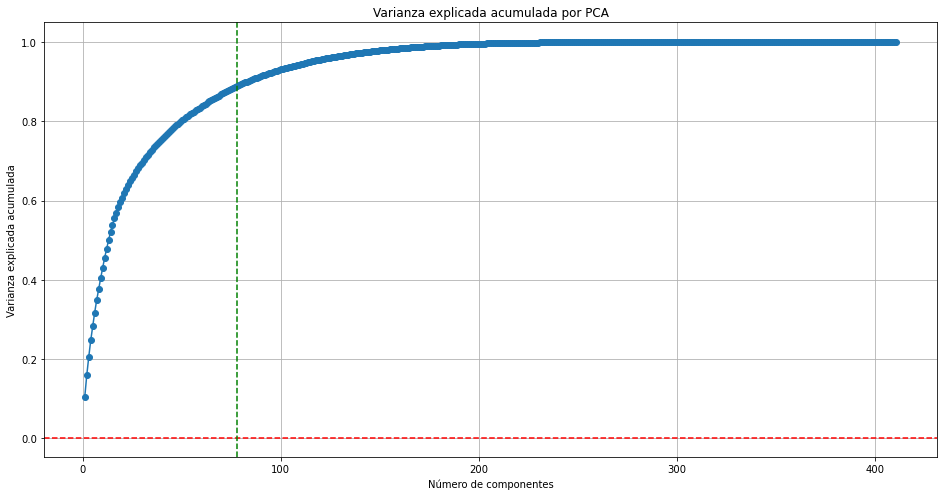

Número óptimo de componentes según Kaiser: 78


In [54]:
# Suponer columnas numéricas y categóricas
num_attribs = numeric_vars  # Ajustar según tus datos
cat_attribs = binary_vars + categorical_vars  # Ajustar según tus datos

# Crear un transformador de columnas
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_attribs),
    ('cat', OneHotEncoder(sparse=False), cat_attribs)  # Asegurar salida densa
])

# Crear un pipeline con preprocesador y PCA
pca = PCA()  # No especificar n_components para calcular todos los componentes
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('pca', pca)])

# Ajustar el modelo
pipeline.fit(df)

# Obtener la varianza explicada y acumulada
varianza_explicada = pipeline.named_steps['pca'].explained_variance_ratio_
varianza_acumulada = varianza_explicada.cumsum()

# Método de Kaiser para determinar el n_components óptimo
valores_propios = pipeline.named_steps['pca'].explained_variance_
kaiser_criterion = valores_propios > valores_propios.mean()
n_components_kaiser = sum(kaiser_criterion)

# Graficar la varianza explicada acumulada
plt.figure(figsize=(16, 8))
plt.plot(range(1, len(varianza_explicada) + 1), varianza_acumulada, marker='o', linestyle='-')
plt.title('Varianza explicada acumulada por PCA')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.axhline(y=1.0 / len(valores_propios), color='r', linestyle='--')  # Línea horizontal para el criterio de Kaiser
plt.axvline(x=n_components_kaiser, color='g', linestyle='--')  # Línea vertical en el punto de corte de Kaiser
plt.grid(True)
plt.show()

print("Número óptimo de componentes según Kaiser:", n_components_kaiser)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


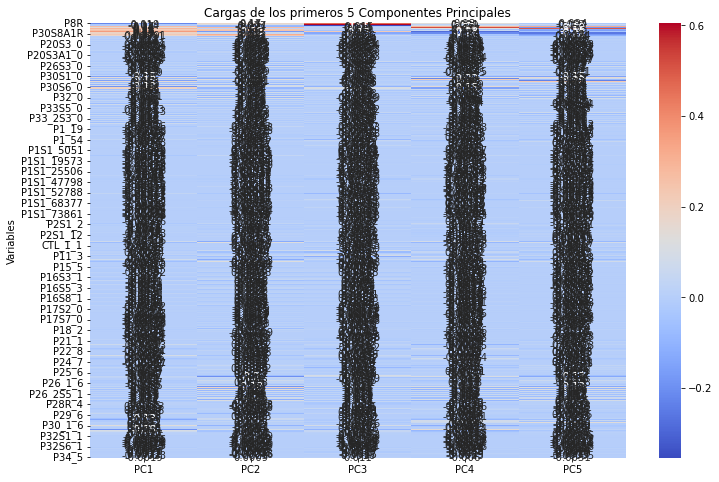

In [52]:
# Crear un pipeline con preprocesador y PCA
pca = PCA(n_components=78)  # Ajustar para calcular 78 componentes
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('pca', pca)])

# Ajustar el modelo
pipeline.fit(df)

# Obtener las cargas de PCA
loadings = pipeline.named_steps['pca'].components_.T  # Transponer para alinear con las características originales
feature_names = preprocessor.transformers_[0][-1] + list(preprocessor.named_transformers_['cat'].get_feature_names(cat_attribs))
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])], index=feature_names)

# Visualizar las cargas para los primeros 5 componentes
plt.figure(figsize=(12, 8))
sns.heatmap(loadings_df.iloc[:, :5], cmap='coolwarm', annot=True)
plt.title('Cargas de los primeros 5 Componentes Principales')
plt.ylabel('Variables')
plt.show()

In [58]:
# Crear un pipeline con preprocesador y PCA
pca = PCA(n_components=10)  # Limitamos a los primeros 10 componentes para este análisis
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('pca', pca)])

# Ajustar el modelo
pipeline.fit(df)

# Obtener la varianza explicada y las cargas de PCA
varianza_explicada = pipeline.named_steps['pca'].explained_variance_ratio_
varianza_acumulada = varianza_explicada.cumsum()
loadings = pipeline.named_steps['pca'].components_.T
feature_names = preprocessor.transformers_[0][-1] + list(preprocessor.named_transformers_['cat'].get_feature_names(cat_attribs))
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])], index=feature_names)

# Mostrar la varianza explicada y acumulada para los primeros 10 componentes
print("Varianza Explicada por cada uno de los primeros 10 componentes:")
for i, var in enumerate(varianza_explicada, 1):
    print(f"PC{i}: {var:.4f} (Acumulada: {varianza_acumulada[i-1]:.4f})")

Varianza Explicada por cada uno de los primeros 10 componentes:
PC1: 0.1055 (Acumulada: 0.1055)
PC2: 0.0541 (Acumulada: 0.1596)
PC3: 0.0459 (Acumulada: 0.2055)
PC4: 0.0420 (Acumulada: 0.2475)
PC5: 0.0360 (Acumulada: 0.2835)
PC6: 0.0343 (Acumulada: 0.3178)
PC7: 0.0309 (Acumulada: 0.3488)
PC8: 0.0282 (Acumulada: 0.3770)
PC9: 0.0268 (Acumulada: 0.4038)
PC10: 0.0261 (Acumulada: 0.4300)


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [60]:
top_bottom_loadings = pd.DataFrame()

for i in range(1, 11):
    top_loadings = loadings_df[f'PC{i}'].nlargest(20).reset_index()
    bottom_loadings = loadings_df[f'PC{i}'].nsmallest(20).reset_index()
    combined = pd.concat([top_loadings, bottom_loadings], axis=1)
    combined.columns = [f'PC{i}_Top_Variable', f'PC{i}_Top_Loading', f'PC{i}_Bottom_Variable', f'PC{i}_Bottom_Loading']
    top_bottom_loadings = pd.concat([top_bottom_loadings, combined], axis=1)

# Mostrar la tabla de loadings
top_bottom_loadings

,PC1_Top_Variable,PC1_Top_Loading,PC1_Bottom_Variable,PC1_Bottom_Loading,PC2_Top_Variable,PC2_Top_Loading,PC2_Bottom_Variable,PC2_Bottom_Loading,PC3_Top_Variable,PC3_Top_Loading,...,PC8_Bottom_Variable,PC8_Bottom_Loading,PC9_Top_Variable,PC9_Top_Loading,PC9_Bottom_Variable,PC9_Bottom_Loading,PC10_Top_Variable,PC10_Top_Loading,PC10_Bottom_Variable,PC10_Bottom_Loading
0,P30S6A1R,0.361356,P8R,-0.219452,P30S8A1R,0.316559,P26_1_0,-0.196772,P23S1R,0.605450,...,P30S2A1R,-0.220313,P30S4A1R,0.560739,P30S3A1R,-0.291209,P30S5A1R,0.557609,P30S4A1R,-0.261979
1,P30S3A1R,0.292191,P30S6_0,-0.190145,P30S2A1R,0.274075,P26_2S2_0,-0.182132,P8R,0.465045,...,P30S7A1R,-0.183372,P30S1A1R,0.307111,P30S7A1R,-0.288242,P23S2,0.356276,P30S9A1R,-0.244367
2,P30S1A1R,0.266586,P30_2_0,-0.190145,P30S5A1R,0.253202,P30S6A1R,-0.176399,P30S6A1R,0.224770,...,P30S5A1R,-0.112353,P30S4_1,0.152112,P30S2A1R,-0.232255,P8R,0.193454,P30S5_0,-0.171161
3,P30S5A1R,0.258384,P30S3_0,-0.153072,P30S9A1R,0.237129,P26_2S3_0,-0.128919,P30S6_1,0.100524,...,P26S1_1,-0.107958,P30S1_1,0.146883,P30S4_0,-0.152112,P30S6A1R,0.178529,P33_2S5_1,-0.138351
4,P30S8A1R,0.227070,P30S1_0,-0.147588,P30S4A1R,0.235651,P5_1,-0.128574,P25_9,0.095153,...,P30S9_0,-0.101145,P30S3_0,0.128447,P30S1_0,-0.146883,P30S5_1,0.171161,P30S7A1R,-0.132009
5,P30S4A1R,0.214138,P30_1_0,-0.132702,P26_2S2_1,0.182132,P13_1,-0.122408,P30_1_6,0.090001,...,P26_1_1,-0.099915,P17_0,0.117717,P30S3_1,-0.128447,P33_2S5_0,0.138351,P33_1_1,-0.123909
6,P30S6_1,0.190145,P30S5_0,-0.088784,P8R,0.170746,P30S2_0,-0.118570,P10R_3,0.085440,...,P30S2_1,-0.094381,P18_0,0.117717,P23S2,-0.122669,P33_1_0,0.123909,P33_2S1_1,-0.119563
7,P30S7A1R,0.187622,P33S3_0,-0.072629,P26_2S3_1,0.128919,P26_2S8_0,-0.111632,P11_2,0.083222,...,P26_2S2_1,-0.084390,P30_1_1,0.102770,P30S6A1R,-0.121633,P33_2S1_0,0.119563,P33S3_1,-0.111506
8,P30S9A1R,0.172662,P5_2,-0.070658,P5_2,0.128692,P30_1_6,-0.101844,P26_2S2_0,0.074577,...,P11_1,-0.073738,P30S5A1R,0.092714,P17_1,-0.117717,P33S3_0,0.111506,P33_2S4_1,-0.103079
9,P30S3_1,0.153072,P30S2_0,-0.070043,P13_3,0.122789,P26S3_0,-0.094787,P26_1_0,0.072016,...,P16S3_4,-0.065850,P30S2_0,0.088292,P8R,-0.106981,P33_2S4_0,0.103079,P17_1,-0.093443
